In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import glob, os, sys, re, math, random
import xml.etree.ElementTree as ET
from rules import *
from predict import *
from raven_data import *
from tqdm.notebook import tqdm

['constant', 'progression', 'arithmetic', 'distribute_three', 'noise']


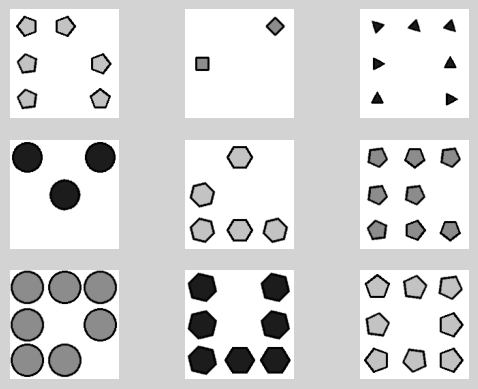

Correct answer: 7


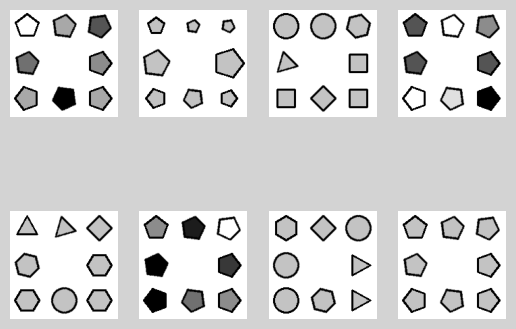

['Size', 'Position', 'Sides', 'Color', 'Angle', 'Size', 'Position', 'Sides', 'Color', 'Angle', 'Size', 'Position', 'Sides', 'Color', 'Angle', 'Size', 'Position', 'Sides', 'Color', 'Angle', 'Size', 'Position', 'Sides', 'Color', 'Angle', 'Size', 'Position', 'Sides', 'Color', 'Angle', 'Size', 'Position', 'Sides', 'Color', 'Angle', 'Size', 'Position', 'Sides', 'Color', 'Angle']
[[672, [131.70833333333334, 132.5], 5, 124.25892857142857, 51.34019470214844], [703, [80.22048364153628, 25.7724039829303], 5, 132.52631578947367, 7.125016689300537], [703, [132.22048364153628, 25.7724039829303], 5, 132.52631578947367, 7.125016689300537], [673, [80.0, 132.7548291233284], 5, 124.45319465081724, 51.34019088745117], [673, [25.0, 80.75482912332838], 5, 124.45319465081724, 51.34019088745117], [673, [25.0, 25.24517087667162], 5, 124.45319465081724, 51.34019088745117]]
[[458, [80.0, 25.5], 4, 80.46943231441048, 90.0], [506, [25.0, 132.5], 1, 96.24308300395256, 45.0]]
[[229, [25.087336244541486, 25.48908296

In [58]:
path = '../RAVEN/new_data_0'
subtype = '*'
items = sorted([x.split('.xml')[0] for x in glob.glob(os.path.join(path, subtype, '*.xml'))])
# print(items)
correct = 0
debug=True
global_counts = [0 for _ in rule_order]
if debug:
    # items=['../RAVEN/new_data_0/center_single/RAVEN_15_train']
    # items=['../RAVEN/new_data_0/in_center_single_out_center_single/RAVEN_15_train']
    # items=['../RAVEN/new_data_0/distribute_four/RAVEN_15_train']
    items=['../RAVEN/new_data_0/distribute_nine/RAVEN_15_train']
    # items=['../RAVEN/new_data_0/in_distribute_four_out_center_single/RAVEN_15_train']
for index, item in enumerate(items):
# for index, item in tqdm(enumerate(items), total=len(items)):
    # embeddings, embedding_names, answer = load_question3(item, parse_mask=False, display=debug, debug=False)
    embeddings, embedding_names, answer = load_question3(item, parse_mask=True, display=debug, debug=False)
    print(embedding_names)
    # print(embeddings)
    for i in range(8):
        print(embeddings[i])
    print(answer)
    print(embeddings[8+answer])

    # Convert the list of embeddings of each shape across the grid instead to a list of shapes and their embeddings across the grid
    # For each shape in the first cell, find the corresponding shape in the second cell and so on

    # Note: some shapes are members of a bitwise array, so we need to group them together as a single shape with the BW tag
    shapes = define_shapes(embeddings, embedding_names, debug=True)
    print("Shapes", len(shapes))
    for shape in shapes:
        for indices in [(0,1,2),(3,4,5),(6,7)]:
            print(" ".join(str(shape[i]) for i in indices))
        print()

    if any(len(embedding) != len(embeddings[0]) for embedding in embeddings):
        print("Error!", item, " has embeddings of different lengths")
        break
    # guess, counts, _ = predict(embeddings,embedding_names,debug=debug)
    # global_counts = [global_counts[i] + counts[i] for i in range(5)]
#     if guess == answer:
#         correct += 1
#         if debug:
#             print("Guessed orrect answer", answer, embeddings[8+answer])
#     else:
#         if debug:
#             grid = [[0, 1, 2], [3, 4, 5], [6, 7, None]]
#             print("\n".join([str([embeddings[col] if col is not None else None for col in row ]) for row in grid]))
#             print("Answer", answer, embeddings[8+answer], "Guess", guess, embeddings[8+guess] if guess is not None else None)
#         print("WRONG",item, "Wrong guess", guess, "Correct answer", answer)
# print("Names of rules:", [rule.__name__ for rule in rule_order])
# print("Counts", global_counts)
# print("Percentages", [global_counts[i]/sum(global_counts) for i in range(5)])

In [44]:
# Test that shape detection is working on datasets with a constant number of shapes
subdatatypes = [('center_single', 1), ('in_center_single_out_center_single', 2), ('in_center_single_out_center_single', 2), ('left_center_single_right_center_single', 2)]
path = '../RAVEN/new_data_0'
correct = 0
debug=False
for subtype, number_shapes in subdatatypes:
    items = sorted([x.split('.xml')[0] for x in glob.glob(os.path.join(path, subtype, '*.xml'))])
    if debug:
        items=['../RAVEN/new_data_0/center_single/RAVEN_15_train']
    for index, item in enumerate(items):
        embeddings, embedding_names, answer = load_question3(item, display=False, debug=False)
        shapes = define_shapes(embeddings, embedding_names)
        if len(shapes) != number_shapes:
            print("Error!", item, " has ", len(shapes), " shapes but expected ", number_shapes)
            break
        if any(len(embedding) != len(embeddings[0]) for embedding in embeddings):
            print("Error!", item, " has embeddings of different lengths")
            break
        else:
            correct += 1
print("Got all", correct, "shape detections correct")

Error! ../RAVEN/new_data_0/in_center_single_out_center_single/RAVEN_0_train  has  1  shapes but expected  2
Error! ../RAVEN/new_data_0/in_center_single_out_center_single/RAVEN_0_train  has  1  shapes but expected  2


KeyboardInterrupt: 

In [3]:
rule = rule_order[9]
print(rule.__name__, rule)
rule_size = rule(3)
print(rule_size.__name__, rule_size)
datapoint = [[[0, 0, 3, 1, 9, 3, 1, 1], [0, 1, 3, 3, 8, 3, 1, 1], [0, 2, 3, 5, 7, 3, 1, 1]],
[[1, 0, 1, 1, 5, 0, 1, 1], [1, 1, 1, 3, 4, 0, 1, 1], [1, 2, 1, 5, 3, 0, 1, 1]]]
res = rule_size(datapoint)
print(res)
# res(datapoint)

IndexError: list index out of range

In [3]:
from collections import defaultdict
unique_value_count = defaultdict(lambda: defaultdict(int))
# unique_value_count = [defaultdict(int) for _ in range(20)]
largest = []
for item in items:
    embeddings, embedding_names, answer = load_question(item, display=False)
    for embedding in embeddings:
        for name, value in zip(embedding_names, embedding):
            if value is not None:
                unique_value_count[name][value] += 1
    if len(embedding_names) > len(largest):
        largest = embedding_names
print("Unique values")
for name, values in unique_value_count.items():
    print(name, sorted(list(values.keys())))

Unique values
Row [0, 1, 2]
Col [0, 1, 2]
Type [1, 2, 3, 4, 5]
Size [0, 1, 2, 3, 4, 5]
Color [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Angle [0, 1, 2, 3, 4, 5, 6, 7]
BWPosition [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 52, 53, 54, 55, 58, 60, 61, 63, 64, 65, 66, 67, 68, 70, 71, 72, 74, 75, 76, 80, 81, 82, 83, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 103, 104, 105, 108, 109, 110, 111, 112, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 144, 145, 146, 147, 148, 151, 152, 154, 158, 159, 160, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 186, 188, 189, 190, 191, 192, 194, 196, 197, 199, 200, 202, 203, 204, 205, 206, 207, 208, 211, 212, 213, 214, 215, 217, 218, 219, 223, 224, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 24